# SI 618 - Homework #1: Data Manipulation

### IMPORTANT: Replace ```?``` in the following code with your uniqname.

In [29]:
MY_UNIQNAME = 'yuqin'

## Background

This homework assignment focuses on the analysis of historical data from the Olympic games.  The description of the data includes the following:
> This is a historical dataset on the modern Olympic Games, including all the Games from Athens 1896 to Rio 2016. I scraped this data from www.sports-reference.com in May 2018.

Your main task in this assignment is to explore the data *using the data
manipulation methods we covered in class* as well as those in the assigned readings.  You may need to consult pandas documentation, Stack Overflow, or other online resources.  

** You should also feel free to ask questions on the class Slack channel!**

A total of 100 points is available in this homework assignment, consisting of:
- 80 points for completing the specific homework questions. More comprehensive 
answers will tend to gain more points.
- 10 points for the overall quality of spelling, grammar, punctuation, and style of written responses.  (see https://faculty.washington.edu/heagerty/Courses/b572/public/StrunkWhite.pdf for a detailed specifications).
- 10 points for creating code that conforms to [PEP 8](https://www.python.org/dev/peps/pep-0008/) guidelines.  You should review those guidelines before proceding with the assignment.


## 0. Download the data from: 
- https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
- https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities (note: we suggest you use the [read_html](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function to load the data into a DataFrame.

## 1. Answer the questions below. 
For each question, you should
1. Write code using Python and pandas that can help you answer the following questions, and
2. Explain your answers in plain English. You should use complete sentences that would be understood by an educated professional who is not necessarily a data scientist (like a product manager).

### 5 pt: Describe the dataset. 
- How many number rows and columns do you see in each data frame? 
- Are there any other interesting descriptive details?

In [66]:
import numpy as np
import pandas as pd
from pandas import DataFrame
%matplotlib inline

#### Dataset 1: athlete_events

In [57]:
athlete_events = pd.read_csv('data/athlete_events.csv', index_col=None)
# Data structure
# Unique Values, Counts, Membership
# Descriptive and Summary Statistics
print("The shape of the dataset is: ", athlete_events.shape)
print("The number of rows of the dataset is: ", len(athlete_events))
print("The number of columns of the dataset is: ", len(athlete_events.columns))
print(athlete_events.sample(5))
print(athlete_events.Age.mean())

The shape of the dataset is:  (271116, 15)
The number of rows of the dataset is:  271116
The number of columns of the dataset is:  15
            ID                            Name Sex   Age  Height  Weight  \
18465     9777  Yevgeny Vladimirovich Belousov   M  21.0   183.0    86.0   
3229      1812          Khaled Anwar Al-Awadhi   M  15.0   170.0    61.0   
101294   51213             Ali Hassain Hussain   M   NaN   165.0    56.0   
261041  130633       Lucinda Williams (-Adams)   F  19.0   166.0    51.0   
248023  124172             Harry Van Barneveld   M  33.0   195.0   125.0   

                  Team  NOC        Games  Year  Season       City  \
18465   Soviet Union-1  URS  1984 Winter  1984  Winter   Sarajevo   
3229            Kuwait  KUW  1980 Summer  1980  Summer     Moskva   
101294            Iraq  IRQ  1960 Summer  1960  Summer       Roma   
261041   United States  USA  1956 Summer  1956  Summer  Melbourne   
248023         Belgium  BEL  2000 Summer  2000  Summer     Sydne

#### Dataset 2: noc_regions

In [55]:
noc_regions = pd.read_csv('data/noc_regions.csv', index_col=None)
print("The number of rows of the dataset is: ", len(noc_regions))
print("The number of columns of the dataset is: ", len(noc_regions.columns))
print("The shape of the dataset is: ", noc_regions.shape)
print(noc_regions.sample(5))
print(noc_regions.region.value_counts().head(1))

The number of rows of the dataset is:  230
The number of columns of the dataset is:  3
The shape of the dataset is:  (230, 3)
     NOC              region           notes
151  NRU               Nauru             NaN
120  LIE       Liechtenstein             NaN
117  LCA         Saint Lucia             NaN
177  SEY          Seychelles             NaN
99   ISV  Virgin Islands, US  Virgin Islands
Germany    4
Name: region, dtype: int64


#### Dataset 3: List of Olympic Games host cities

In [80]:
#Read HTML tables into a list of DataFrame objects.
url = 'https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
host_cities = pd.read_html(url,header=0)
cities = host_cities[1]
print("The number of rows of the dataset is: ", len(cities))
print("The number of columns of the dataset is: ", len(cities.columns))
print("The shape of the dataset is: ", cities.shape)
print(cities.sample(2))
print(cities.City.value_counts().head(5))

The number of rows of the dataset is:  68
The number of columns of the dataset is:  10
The shape of the dataset is:  (68, 10)
          City      Country Continent  Summer (Olympiad)  Winter  \
6   Antwerp[d]      Belgium    Europe                NaN     NaN   
19  St. Moritz  Switzerland    Europe                NaN     NaN   

    Summer (Youth)  Winter (Youth)  Year Opening Ceremony  Closing Ceremony  
6              NaN             NaN  1920         April 20  September 12[11]  
19             NaN             NaN  1948       January 30        February 8  
Los Angeles    3
London         3
Innsbruck      3
Paris          3
Tokyo          2
Name: City, dtype: int64


#### Dataset 4: List of Olympic Game host cities that hosted multiple editions

In [74]:
hosted_multiple_editions = host_cities[2]
print("The number of rows of the dataset is: ", len(hosted_multiple_editions))
print("The number of columns of the dataset is: ", len(hosted_multiple_editions.columns))
hosted_multiple_editions

The number of rows of the dataset is:  10
The number of columns of the dataset is:  8


,City,Country,Continent,Summer Olympics,Winter Olympics,Summer Youth Olympics,Winter Youth Olympics,Total
0,London,United Kingdom,Europe,"3 (1908, 1948, 2012)",0,0,0,3.0
1,Paris,France,Europe,"3 (1900, 1924, 2024)",0,0,0,NaN
2,Los Angeles,United States,North America,"3 (1932, 1984, 2028)",0,0,0,NaN
3,Innsbruck,Austria,Europe,0,"2 (1964, 1976)",0,1 (2012),NaN
4,Athens,Greece,Europe,"2 (1896, 2004)",0,0,0,2.0
5,Tokyo,Japan,Asia,"2 (1964, 2020)",0,0,0,NaN
6,Beijing,China,Asia,1 (2008),1 (2022),0,0,NaN
7,St. Moritz,Switzerland,Europe,0,"2 (1928, 1948)",0,0,NaN
8,Lake Placid,United States,North America,0,"2 (1932, 1980)",0,0,NaN
9,Lillehammer,Norway,Europe,0,1 (1994),0,1 (2016),NaN


#### Dataset 5: List of Olympic Game host countries

In [75]:
countries = host_cities[3]
print("The number of rows of the dataset is: ", len(countries))
print("The number of columns of the dataset is: ", len(countries.columns))
countries.head(1)

The number of rows of the dataset is:  26
The number of columns of the dataset is:  8


,Rank,Country,Continent,Summer Olympics,Winter Olympics,Summer Youth Olympics,Winter Youth Olympics,Total
0,1,United States,North America,"5 (1904, 1932, 1984, 1996, 2028)","4 (1932, 1960, 1980, 2002)",0,0,9.0


#### Dataset 6: List of Olympic Game host continents

In [78]:
continents = host_cities[4]
print("The number of rows of the dataset is: ", len(continents))
print("The number of columns of the dataset is: ", len(continents.columns))
continents.head(1)

The number of rows of the dataset is:  6
The number of columns of the dataset is:  7


,Rank,Continent,Summer Olympics,Winter Olympics,Summer Youth Olympics,Winter Youth Olympics,Total
0,1,Europe,"17 (1896, 1900, 1908, 1912, 1916, 1920, 1924, ...","14 (1924, 1928, 1936, 1940, 1944, 1948, 1952, ...",0,"3 (2012, 2016, 2020)",34


#### Dataset 7: List of Olympic Game host cities that were unsuccessful

In [83]:
unsuccessful_cities = host_cities[6]
print("The number of rows of the dataset is: ", len(unsuccessful_cities))
print("The number of columns of the dataset is: ", len(unsuccessful_cities.columns))
unsuccessful_cities.Country.value_counts()

The number of rows of the dataset is:  18
The number of columns of the dataset is:  3


United States         4
Mexico                2
Spain                 2
Qatar                 1
Turkey                1
Cuba                  1
Belgium               1
Puerto Rico           1
Australia             1
Slovakia              1
Yugoslavia/ Serbia    1
Hungary               1
Azerbaijan            1
Name: Country, dtype: int64

### 5 pt: What is the overall ratio of female to male atheletes? 
There are multiple ways one could determine the meaning of "overall" here, and there isn't necessarily one correct answer. Based on your interpretation, give a justification for the choices you made in your analysis.

In [111]:
print(athlete_events.Sex.unique())
F_all = athlete_events.Sex.value_counts()['F']
M_all = athlete_events.Sex.value_counts()['M']
Ratio_all = float(F_all/M_all)
print("Overall female atheletes: "+ str(F_all))
print("Overall male atheletes: "+ str(M_all))
print("The overall ratio of female to male atheletes for all Olympic Games from Athens 1896 to Rio 2016 is: "+ str(Ratio_all))

print(athlete_events.Season.unique())
Summer = athlete_events.Season == 'Summer'
Winter = athlete_events.Season == 'Winter'
Summer_F_all = athlete_events[Summer].Sex.value_counts()['F']
Summer_M_all = athlete_events[Summer].Sex.value_counts()['M']
Ratio_Summer = float(Summer_F_all/Summer_M_all)
Winter_F_all = athlete_events[Winter].Sex.value_counts()['F']
Winter_M_all = athlete_events[Winter].Sex.value_counts()['M']
Ratio_Winter = float(Winter_F_all/Winter_M_all)
print("The overall ratio of female to male atheletes for summer Olympic Games is: "+ str(Ratio_Summer))
print("The overall ratio of female to male atheletes for winter Olympic Games is: "+ str(Ratio_Winter))

['M' 'F']
Overall female atheletes: 74522
Overall male atheletes: 196594
The overall ratio of female to male atheletes for all Olympic Games from Athens 1896 to Rio 2016 is: 0.37906548521318045
['Summer' 'Winter']
The overall ratio of female to male atheletes for summer Olympic Games is: 0.3644372781391585
The overall ratio of female to male atheletes for winter Olympic Games is: 0.4503210392713155


### 10 pt: Which athelete competed in most number of events? 
In which events did the athelete participate, and for what range of years? Which country did the athlete represent?

In [189]:
print(athlete_events.ID.value_counts().head(1))
print(athlete_events[(athlete_events['ID'] == 77710)].Name.unique())

The_most_competed_athelete = athlete_events.Name == 'Robert Tait McKenzie'
print(athlete_events[The_most_competed_athelete].Event.value_counts())
print(athlete_events[The_most_competed_athelete].Year.value_counts())
print(athlete_events[The_most_competed_athelete].Team.unique())

77710    58
Name: ID, dtype: int64
['Robert Tait McKenzie']
Art Competitions Mixed Sculpturing, Unknown Event         48
Art Competitions Mixed Sculpturing, Statues                7
Art Competitions Mixed Sculpturing                         1
Art Competitions Mixed Sculpturing, Medals                 1
Art Competitions Mixed Sculpturing, Medals And Reliefs     1
Name: Event, dtype: int64
1932    44
1928     7
1936     5
1912     1
1948     1
Name: Year, dtype: int64
['Canada']


Robert Tait McKenzie competed in most number of events. 

1. He participated in an event named "Art Competitions Mixed Sculpturing, Unknown Event" for 48 times, an event named "Art Competitions Mixed Sculpturing, Statues" for seven times, an event named "Art Competitions Mixed Sculpturing" once, an event named "Art Competitions Mixed Sculpturing, Medals" once and an event named "Art Competitions Mixed Sculpturing, Medals And Reliefs" once. 

2. He attended those events from 1912 to 1948, respectively in 1912, 1928, 1932, 1936 and 1948. 

3. Through those editions of Games, he represented Canada to take part in those events.


### 10 pt: Which sport has the highest median athlete age? 
To determine this, you might want to plot the median age for each sport. You may want to sort the axes appropriately for your analysis.

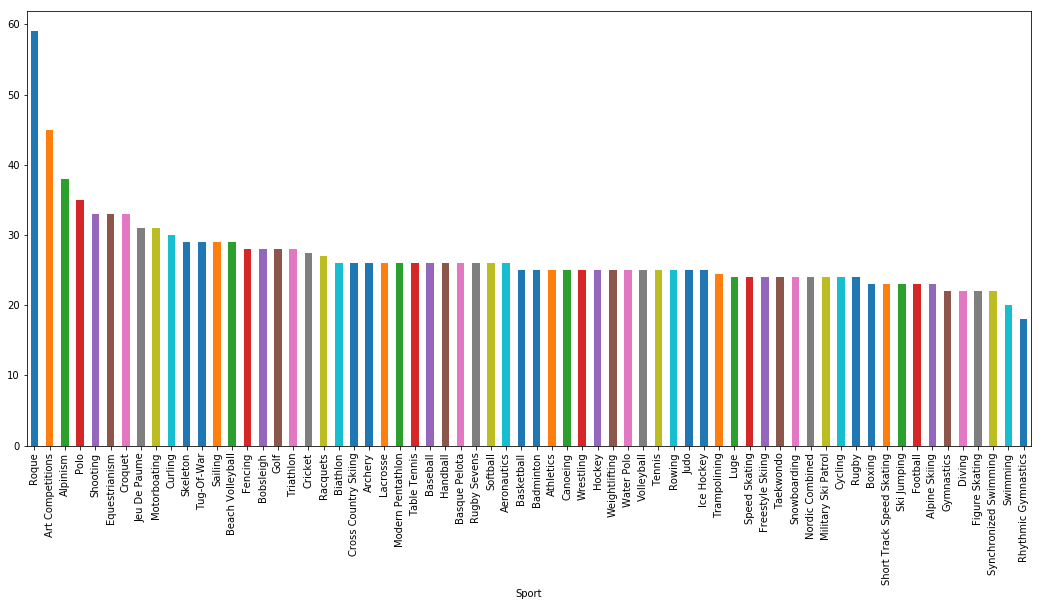

In [361]:
athlete_events.groupby(['Sport'])['Age'].median().sort_values(ascending=False).plot(kind='bar', figsize=(18,8))

### 10 pt: In which events has Jamaica won the most medals?

In [338]:
# What kind of medals we have?
athlete_events.Medal.unique()
medals = ['Gold','Bronze','Silver']

# What events did jamaica participate in?
Jamaica = athlete_events.Team == 'Jamaica'
Jamaica_events = athlete_events[Jamaica].Event.unique()

for i in Jamaica_events:
    one_event = athlete_events[athlete_events['Event'] == i]
    a = one_event.groupby('Team').Medal.size().sort_values(ascending=False).head(1)
    #select the Jamica
    if a.index[0]== 'Jamaica':
        print(i, a)

Athletics Women's 4 x 400 metres Relay Team
Jamaica    60
Name: Medal, dtype: int64


### 10 pt: Which countries have more female medalists than male medalists?

In [360]:
# medalists
medalists = athlete_events[(athlete_events['Medal'] == 'Gold')| (athlete_events['Medal'] == 'Bronze')|(athlete_events['Medal'] == 'Silver')]
# how many teams that have medalists from different countries we have?
countris_list = medalists.NOC.unique()
# groupby Sex for each coutries
NOC = []
for i in countris_list:
    one_country = medalists[medalists['NOC'] == i]
    a = one_country.groupby('Sex').size().sort_values(ascending=False)
    if a.index[0]=='F':
        NOC.append(i)
countries = []
for i in NOC:
    a = noc_regions[noc_regions['NOC'] == i].region.unique()
    if len(a) == 1:
        countries.append(a[0])
print("The countries that have more female medalists than male medalists are: " + str(countries))

The countries that have more female medalists than male medalists are: ['Belarus', 'Romania', 'Ukraine', 'Jamaica', 'North Korea', 'China', 'Montenegro', 'Peru', 'Zimbabwe', 'Liechtenstein', 'Bahrain', 'Kosovo', 'Mozambique', 'Costa Rica']


Answer: I first filtered all the medalists from the table and created a new dataset called "medalists".
In this list of medalists, I then created a list to store the countries' code, from which those medalists came. For each country, I compared the number of female medalists with male medalists and outputted the countries that have more female medalists than male medalists. At last, I used the table for the countries' codes to find the countries name.

### 10 pt: Which country won the most medal points in each of the 2014 Winter Olympics?
Rank each country by a score, where 3 points are assigned for a gold medal, 2 points for silver, and 1 point for bronze.

In [403]:
winter_olympics = medalists[(medalists['Games'] == '2014 Winter')]
NOC_list = winter_olympics.NOC.unique()
country_name = []
points = []
for i in NOC_list:
    country_name.append(i)
    medal_points = 0
    one_country = winter_olympics[winter_olympics['NOC'] == i]
    medal_type = one_country.Medal
    for i in medal_type:
        if i == 'Gold':
            medal_points += 3
        if i == 'Silver':
            medal_points += 2
        if i == 'Bronze':
            medal_points += 1
    points.append(medal_points)
    
country_dict = dict(zip(country_name,points))
value = 0
country = ''
for k, v in country_dict.items():
    if v > value:
        value = v
        country = k
print(country,value)

CAN 226


### 20 pt: For each year in which games were held, what proportion of gold medals did the host country win? 
You will need to combine multiple datasets to complete the analysis.  

In [574]:
# host country for each game of each year
url = 'https://en.wikipedia.org/wiki/List_of_Olympic_Games_host_cities'
host_cities = pd.read_html(url,header=0)
countries = host_cities[3]

# deal with the data format of the year list
winter_olympics = {}
summer_olympics = {}
for c in range(len(countries['Winter Olympics'])):
    country_name = countries.loc[c].Country
    w_one = countries['Winter Olympics'][c].split('(',2)[-1]
    w_two = w_one.split(')',2)[0]
    w_year_list = w_two.split(',')
    winter_olympics[country_name] = w_year_list
    
    s_one = countries['Summer Olympics'][c].split('(',2)[-1]
    s_two = s_one.split(')',2)[0]
    s_year_list = s_two.split(',')
    summer_olympics[country_name] = s_year_list

In [577]:
# filter all medalists that won the goal medals
gold = athlete_events[athlete_events['Medal'] == 'Gold']
games = gold.Games.unique()

# for each game
for i in games:
    one_game = gold[gold['Games'] == i]
    # we have known the host city, what the host country was?
    city = one_game.City.unique()[0]
    year = one_game.Year.unique()[0]
    season = one_game.Season.unique()[0]
    if season == 'Winter':
        for k,v in winter_olympics.items():
            for n in v:
                if n == str(year):
                    country = k
                    
    if season == 'Summer':
        for k,v in summer_olympics.items():
            for n in v:
                if n == str(year):
                    country = k
                                   
    # how many gold medals in one year's winter/summer game?
    gold_sum = len(one_game)
    
    # how many gold medals the host country won?
    number = len(one_game[one_game['Team']==country])
 
    # what proportion of gold medals did the host country win?
    portion = number/gold_sum
    print(country, portion)
      

France 0.10945273631840796
France 0.08996539792387544
France 0.04807692307692308
France 0.018518518518518517
France 0.017045454545454544
China 0.10730253353204174
China 0.0
Sweden 0.29141104294478526
Australia 0.09271523178807947
Australia 0.028481012658227847
Australia 0.08748114630467571
Australia 0.05263157894736842
Soviet Union/ Russia 0.0
South Korea 0.05384615384615385
South Korea 0.012072434607645875
Italy 0.11650485436893204
Italy 0.022277227722772276
Spain 0.08586762075134168
Spain 0.0
Norway 0.15555555555555556
United States 0.37572254335260113
United States 0.2925764192139738
United States 0.3285198555956679
United States 0.17319277108433734
Brazil 0.05112781954887218
Belgium 0.10953346855983773
Canada 0.0
Canada 0.003205128205128205
Canada 0.0032679738562091504
Canada 0.3620689655172414
Soviet Union/ Russia 0.0
Soviet Union/ Russia 0.0
Netherlands 0.08163265306122448
Netherlands 0.0
United Kingdom 0.0
Mexico 0.008356545961002786
Mexico 0.0
Mexico 0.0
Austria 0.0491803278688

(Use this space to explain your answers)

## Please submit your completed notebook in .IPYNB and .HTML formats via Canvas